In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:\\Users\\ankur_vc1xnom\\Desktop\\LP4\\LP4\\ecg.csv')

In [3]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [4]:
column_names = [i for i in range(141)] 
df.columns = column_names

In [5]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

In [6]:
# Splitting the dataset into features and target
features = df.drop(140, axis=1)  # Features are all columns except the last (column 140)
target = df[140]  # Target is the last column (column 140)

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2
)

# Get the indices of the training data points labeled as "1" (anomalies)
train_index = y_train[y_train == 1].index

# Select the training data points that are anomalies
train_data = x_train.loc[train_index]

In [7]:
# Initialize the Min-Max Scaler to scale the data between 0 and 1
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the training data
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())

# Scale the testing data using the same scaler
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [8]:
# Creating an Autoencoder model by extending the Model class from Keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        # Define the encoder part of the Autoencoder
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])
        # Define the decoder part of the Autoencoder
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        # Forward pass through the Autoencoder
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])

model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,  
    x_train_scaled,  
    epochs=20,        
    batch_size=512,   
    validation_data=(x_test_scaled, x_test_scaled),  
    shuffle=True     
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0111 - mse: 0.0248 - val_loss: 0.0131 - val_mse: 0.0304
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mse: 0.0236 - val_loss: 0.0128 - val_mse: 0.0296
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0097 - mse: 0.0217 - val_loss: 0.0124 - val_mse: 0.0288
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mse: 0.0188 - val_loss: 0.0125 - val_mse: 0.0288
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mse: 0.0165 - val_loss: 0.0122 - val_mse: 0.0281
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mse: 0.0142 - val_loss: 0.0113 - val_mse: 0.0262
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mse: 0.0123 - val_loss: 0.0106 - val_mse: 0.0247
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - mse: 0.0115 - val_loss: 0.0102 - val_mse: 0.0238
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mse: 0.0105 - 

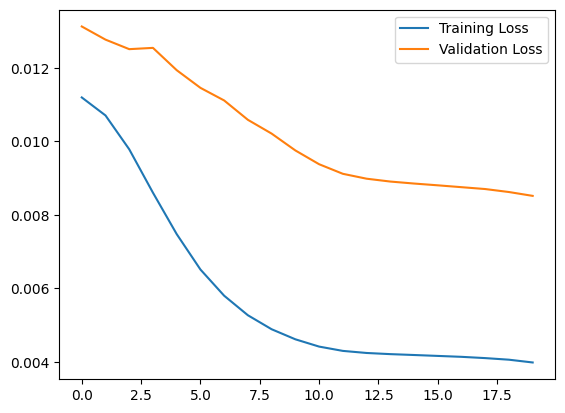

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [11]:
def find_threshold(model, x_train_scaled):
    recons = model.predict(x_train_scaled)

    recons_error = tf.keras.metrics.msle(recons, x_train_scaled)

    threshold = np.mean(recons_error.numpy()) + np.std(recons_error.numpy())

    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)

    errors = tf.keras.losses.msle(predictions, x_test_scaled)

    anomaly_mask = pd.Series(errors) > threshold

    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)

    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold: 0.008583036277213177


In [12]:
from sklearn import metrics
predictions = get_predictions(model, x_test_scaled, threshold)

accuracy = metrics.accuracy_score(predictions, y_test)

print(f"Accuracy Score: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score: 0.935
